<a href="https://colab.research.google.com/github/maggiecrowner/DS-4002-mqq9sb/blob/spring-2025_section-18751/hotdog_cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hotdog Data Cleaning and EDA**

In [1]:
! git clone -b spring-2025_section-18751 https://github.com/maggiecrowner/DS-4002-mqq9sb.git

Cloning into 'DS-4002-mqq9sb'...
remote: Enumerating objects: 636, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 636 (delta 163), reused 81 (delta 81), pack-reused 453 (from 2)
Receiving objects: 100% (636/636), 3.44 MiB | 5.92 MiB/s, done.
Resolving deltas: 100% (357/357), done.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("/content/DS-4002-mqq9sb/hot-dog-survey-data/hot_dog_survey_spring25.xlsx - Form Responses 1.csv")

# Column names
df.columns = ['Timestamp', 'Response', 'Rationale', 'Enrolled', 'Major', 'State', 'Year', 'Gender', 'GenderDescribe']

# Response column
df['Response'] = df['Response'].apply(lambda x: 'Yes' if x[0].lower() == 'y' else x)
df['Response'] = df['Response'].apply(lambda x: 'No' if x[0].lower() == 'n' else x)

# State column
df['State'] = df['State'].apply(lambda x: 'Virginia' if 'virginia' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'Virginia' if 'va' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'New Jersey' if 'nj' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'Washington D.C.' if 'dc' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'New York' if 'ny' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'California' if 'ca' in str(x).lower() else x)
df['State'] = df['State'].str.title()
df['State'] = df['State'].apply(lambda x: 'United States' if 'us' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'United States' if 'america' in str(x).lower() else x)
df['State'] = df['State'].apply(lambda x: 'United States' if 'u.s.' in str(x).lower() else x)

# Removing rows and columns
df = df.drop(['Timestamp', 'Rationale', 'GenderDescribe'], axis=1)
df = df.dropna()
df = df.drop('Enrolled', axis=1)

# Gender column
df['Gender'] = df['Gender'].apply(lambda x: 'Other' if 'prefer' in str(x).lower() else x)
df['Gender'] = df['Gender'].apply(lambda x: 'Other' if 'non-binary' in str(x).lower() else x)

# Major column
df['Major'] = df['Major'].str.title()

display(df)

,Response,Major,State,Year,Gender
0,No,Applied Statistics With Data Science Conc + Da...,Virginia,Third year,Woman
1,No,Economics/Pre-Comm,Virginia,Second year,Woman
2,No,Biology,Virginia,Third year,Woman
3,Yes,Biology And Psychology,Virginia,Fourth year,Woman
4,No,Nursing,Virginia,Second year,Woman
5,Yes,Mechanical Engineering,Vietnam,Second year,Woman
6,No,Biochemistry,Ghana,First year,Woman
7,No,Women Gender And Sexuality Studies,Virginia,Fourth year,Woman
8,No,Pre Med,United States,First year,Man
9,Yes,Physics + Mathematics,Louisiana,Second year,Man


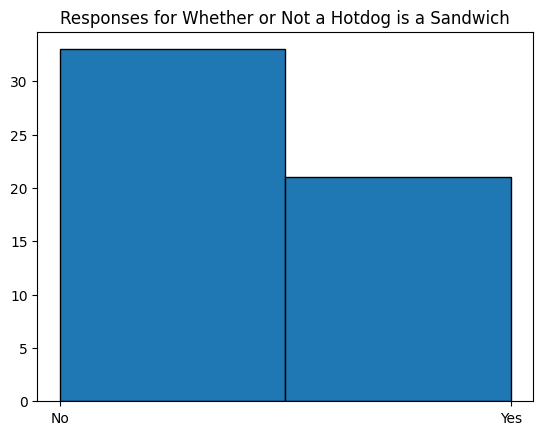

In [51]:
plt.hist(df['Response'], bins=2, edgecolor='black')
plt.title('Responses for Whether or Not a Hotdog is a Sandwich')
plt.show()

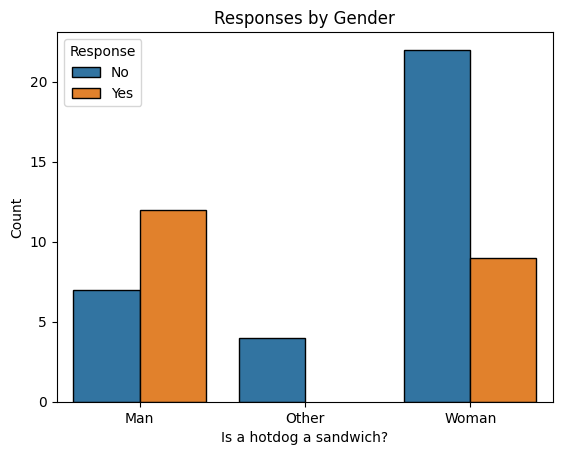

In [62]:
counts = df.groupby(['Gender', 'Response']).size().reset_index(name='Count')

sns.barplot(data=counts, x='Gender', y='Count', hue='Response', edgecolor='black')

plt.title('Responses by Gender')
plt.xlabel('Is a hotdog a sandwich?')
plt.ylabel('Count')
plt.show()

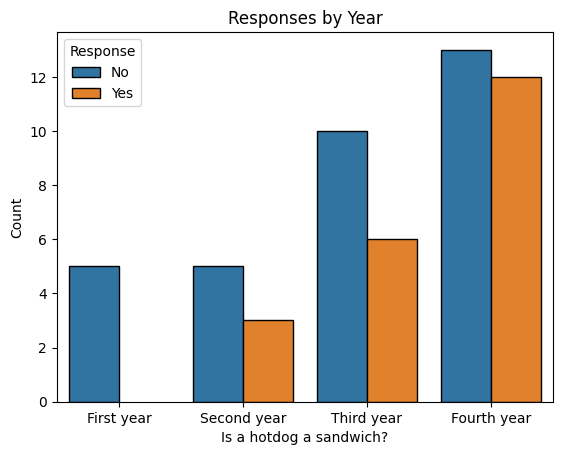

In [63]:
counts = df.groupby(['Year', 'Response']).size().reset_index(name='Count')

year_order = ['First year', 'Second year', 'Third year', 'Fourth year']
sns.barplot(data=counts, x='Year', y='Count', hue='Response', edgecolor='black', order=year_order)

plt.title('Responses by Year')
plt.xlabel('Is a hotdog a sandwich?')
plt.ylabel('Count')
plt.show()